<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Метод-увеличения-выборки." data-toc-modified-id="Метод-увеличения-выборки.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Метод увеличения выборки.</a></span></li><li><span><a href="#Метод-уменьшения-выборки" data-toc-modified-id="Метод-уменьшения-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метод уменьшения выборки</a></span></li><li><span><a href="#Метод-балансировки-весов-классов" data-toc-modified-id="Метод-балансировки-весов-классов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Метод балансировки весов классов</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Цель данного проекьа построить модель которая сможет предсказать уйдёт клиент из банка в ближайшее время или нет.

Для исследовани предоставлены исторические данные о поведении клиентов и расторжении договоров с «Бета-Банком». Известно, чтоиз банка стали уходить клиенты банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

## Подготовка данных

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from joblib import dump
from sklearn.metrics import roc_curve

In [58]:
df = pd.read_csv('/datasets/Churn.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Согласно документации к данным:



* `RowNumber` — индекс строки в данных;
* `CustommerID` — уникальный идентификатор клиента;  
* `Surname` — фамилия;
* `CreditScore` — кредитный рейтинг;
* `Geography` — страна проживания;
* `Gender` — пол;  
* `Age` — возраст;
* `Tenure` — сколько лет человек является клиентом банка;
* `Balance` — баланс на счёте;
* `NumOfProducts` — количество продуктов банка, используемых клиентом;
* `HasCrCard` — наличие кредитной карты;  
* `IsActiveMember` — активность клиента;
* `EstimatedSalary` — предполагаемая зарплата.

Целевой признак:
    
* `Exited` — факт ухода клиента

Из описания данных можно заметить небольшое кол-во пропущенных значений в столбце Tenure, заменим их на среднее столбца:

In [59]:
print('Кол-во пропущенных значений до замены:')
print(df['Tenure'].isna().sum())

Кол-во пропущенных значений до замены:
909


In [60]:
df['Tenure'] = df['Tenure'].fillna(-1)
df['Tenure'] = df['Tenure'].astype(object)

df.info()

print('Кол-во пропущенных значений после замены:')
print(df['Tenure'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  object 
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB
Кол-во пропущенных значений после замены:
0


В таблице присутствуют столбцы которые не понадобяться для классификации, так как не несут какой-либо информации по которой можно сделать вывод к какому классу относится клиент.


In [61]:
df = df.drop('Surname', axis = 1)
df = df.drop('CustomerId', axis = 1)
df = df.drop('RowNumber', axis = 1)

Прменим технику прямого кодирования для всего датафрейма.

In [62]:
df = pd.get_dummies(df, drop_first = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Balance            10000 non-null  float64
 3   NumOfProducts      10000 non-null  int64  
 4   HasCrCard          10000 non-null  int64  
 5   IsActiveMember     10000 non-null  int64  
 6   EstimatedSalary    10000 non-null  float64
 7   Exited             10000 non-null  int64  
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Tenure_0.0         10000 non-null  uint8  
 12  Tenure_1.0         10000 non-null  uint8  
 13  Tenure_2.0         10000 non-null  uint8  
 14  Tenure_3.0         10000 non-null  uint8  
 15  Tenure_4.0         10000 non-null  uint8  
 16  Tenure_5.0         1000

Проверим распределение классов в столбце Exited.

In [63]:
print(df['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


In [64]:
print((df['Exited'] == 1).sum() / ((df['Exited'] == 1).sum() + (df['Exited'] == 0).sum()) * 100)

20.369999999999997


Разобьём данные на выборки.

In [65]:
train, test = train_test_split(
    df, train_size=0.6, random_state=42, stratify=df['Exited'])

features = df.drop(['Exited'], axis = 1)
target = df['Exited']

features_train, features_prom, target_train, target_prom = \
train_test_split(features, target, test_size = 0.4, random_state = 12345, stratify = target)

features_valid, features_test, target_valid, target_test = \
train_test_split(features_prom, target_prom, test_size = 0.5, random_state = 12345, stratify = target_prom)

print('Проверим на сбалансированность таргетов в выборках:')
print('target_train:')
print(target_train.value_counts())
print()

print('target_test:')
print(target_test.value_counts())

#копии для пункта борьбы с дисбалансом
features_train_copy = features_train.copy() 
target_train_copy = target_train.copy()

Проверим на сбалансированность таргетов в выборках:
target_train:
0    4778
1    1222
Name: Exited, dtype: int64

target_test:
0    1593
1     407
Name: Exited, dtype: int64


Устранив пропуски, убрав лишние значения изучил данные, можно заметить неравномерное распределение классов в датафрейме. Всего 20% данных это 1, остальные 80% это 0.

## Исследование задачи

Перед исследованием стандартизируем данные.

In [66]:
scaler = StandardScaler()

scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

Найдем наилучшие параметры для нескольких моделей.

In [67]:
%%time

model_gs = RandomForestClassifier(random_state=12345, criterion="gini")
parametrs_gs  = {
    "n_estimators": [100, 101, 102, 103, 104, 105, 106],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
}
gs = GridSearchCV(estimator = model_gs,
                  param_grid = parametrs_gs,
                  cv=5)
gs.fit(features_train, target_train)
print(gs.best_estimator_)
print(gs.best_score_)

RandomForestClassifier(min_samples_leaf=3, n_estimators=104, random_state=12345)
0.8629999999999999
CPU times: user 2min 3s, sys: 599 ms, total: 2min 3s
Wall time: 2min 3s


In [68]:
%%time

model = RandomForestClassifier(random_state=12345, criterion='gini', min_samples_leaf=3, n_estimators=104)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1: ", f1_score(target_valid, predicted_valid))
print("ROC_AUC: ", roc_auc_score(target_valid, predicted_valid))
print("RECALL: ", recall_score(target_valid, predicted_valid))
print("PRECISION: ", precision_score(target_valid, predicted_valid))
print("Accuracy_score ", accuracy_score(target_valid, predicted_valid))

F1:  0.5916795069337442
ROC_AUC:  0.7199046704108779
RECALL:  0.47058823529411764
PRECISION:  0.7966804979253111
Accuracy_score  0.8675
CPU times: user 633 ms, sys: 3.9 ms, total: 636 ms
Wall time: 641 ms


Лучшие показатели модели:
max_iter = 100
accuracy = 0.812


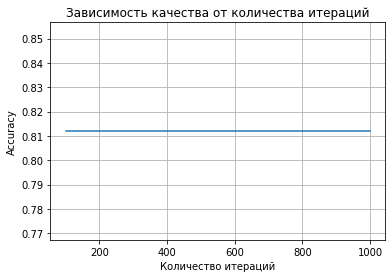

F1:  0.31386861313868614
ROC_AUC:  0.5884323578677703
RECALL:  0.2107843137254902
PRECISION:  0.6142857142857143
CPU times: user 1.35 s, sys: 1.85 s, total: 3.2 s
Wall time: 3.11 s


In [69]:
%%time

best_model_two = None
best_result_two = 0
best_iter = 0

x_two = []
y_two = []

for i in range(100, 1100, 100):
    model_two = LogisticRegression(random_state = 12345, solver = 'lbfgs', max_iter = i)
    model_two.fit(features_train, target_train)
    dump(model_two, 'model_9_1.joblib')
    predictions_two = model_two.predict(features_valid)
    result_two = accuracy_score(target_valid, predictions_two)
    x_two.append(i)
    y_two.append(result_two)
    if result_two > best_result_two:
        best_model_two = model_two
        best_result_two = result_two
        best_iter = i

print('Лучшие показатели модели:')
print('max_iter =', best_iter)
print('accuracy =', best_result_two)

plt.plot(x_two, y_two)
plt.title('Зависимость качества от количества итераций')
plt.xlabel("Количество итераций")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

predictions_regression = model_two.predict(features_valid)
print("F1: ", f1_score(target_valid, predictions_regression))
print("ROC_AUC: ", roc_auc_score(target_valid, predictions_regression))
print("RECALL: ", recall_score(target_valid, predictions_regression))
print("PRECISION: ", precision_score(target_valid, predictions_regression))

## Борьба с дисбалансом

###  Метод увеличения выборки.

In [70]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_eros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_eros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample(features_train_copy, target_train_copy, 4)

model_three = RandomForestClassifier(random_state = 12345,  max_depth = 12,  min_samples_leaf=3, n_estimators = 96)

model_three.fit(features_train_upsampled, target_train_upsampled)

predicted_three = model_three.predict(features_valid)

print('F1 =', f1_score(target_valid, predicted_three))
print('ROC-AUC =', roc_auc_score(target_valid, predicted_three))
print('RECALL =', recall_score(target_valid, predicted_three))
print('PRECISION =', precision_score(target_valid, predicted_three))
print('Accuracy =', accuracy_score(target_valid, predicted_three))

F1 = 0.27831325301204823
ROC-AUC = 0.462422406148389
RECALL = 0.5661764705882353
PRECISION = 0.18450479233226838
Accuracy = 0.401


In [71]:
model_four = LogisticRegression(random_state = 12345, solver = 'lbfgs', max_iter = 100)
model_four.fit(features_train_upsampled, target_train_upsampled)
dump(model_four, 'model_9_1.joblib')
predictions_four = model_four.predict(features_valid)

print("F1: ", f1_score(target_valid, predictions_four))
print("ROC_AUC: ", roc_auc_score(target_valid, predictions_four))
print("RECALL: ", recall_score(target_valid, predictions_four))
print("PRECISION: ", precision_score(target_valid, predictions_four))
print("Accuracy score ", accuracy_score(target_valid, predictions_four))

F1:  0.48707909162098667
ROC_AUC:  0.7058761946989851
RECALL:  0.7622549019607843
PRECISION:  0.3578826237054085
Accuracy score  0.6725


### Метод уменьшения выборки

In [72]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac = fraction, random_state = 12345)] +[features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac = fraction, random_state = 12345)] + [target_ones])
    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train_copy, target_train_copy, 0.25)

model_seven = LogisticRegression(random_state = 12345, solver = 'liblinear', max_iter = 100)
model_seven.fit(features_train_downsampled, target_train_downsampled)
predictions_seven = model_seven.predict(features_valid)
print("F1: ", f1_score(target_valid, predictions_seven))
print("ROC_AUC: ", roc_auc_score(target_valid, predictions_seven))
print("RECALL: ", recall_score(target_valid, predictions_seven))
print("PRECISION: ", precision_score(target_valid, predictions_seven))
print("Accuracy score ", accuracy_score(target_valid, predictions_seven))

F1:  0.486697965571205
ROC_AUC:  0.7055621243472263
RECALL:  0.7622549019607843
PRECISION:  0.35747126436781607
Accuracy score  0.672


In [73]:
model_eight = RandomForestClassifier(random_state = 12345,  max_depth = 12,  min_samples_leaf=3, n_estimators = 104)
model_eight.fit(features_train_downsampled, target_train_downsampled)
predicted_eight = model_eight.predict(features_valid)

print('F1 =', f1_score(target_valid, predicted_eight))
print('ROC-AUC =', roc_auc_score(target_valid, predicted_eight))
print('RECALL =', recall_score(target_valid, predicted_eight))
print('PRECISION =', precision_score(target_valid, predicted_eight))
print('Accuracy =', accuracy_score(target_valid, predicted_eight))

F1 = 0.33489561141883256
ROC-AUC = 0.4960648832397281
RECALL = 0.9632352941176471
PRECISION = 0.20268179473955647
Accuracy = 0.2195


### Метод балансировки весов классов

In [74]:
model_five = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight = 'balanced')
model_five.fit(features_train, target_train)
predictions_five = model_five.predict(features_valid)
print("F1: ", f1_score(target_valid, predictions_five))
print("ROC_AUC: ", roc_auc_score(target_valid, predictions_five))
print("RECALL: ", recall_score(target_valid, predictions_five))
print("PRECISION: ", precision_score(target_valid, predictions_five))
print("Accuracy score ", accuracy_score(target_valid, predictions_five))

F1:  0.5217391304347827
ROC_AUC:  0.7288279633461425
RECALL:  0.7352941176470589
PRECISION:  0.40431266846361186
Accuracy score  0.725


In [75]:
model_six = RandomForestClassifier(random_state = 12345,  max_depth = 12,  min_samples_leaf=3, n_estimators = 96, class_weight = 'balanced')
model_six.fit(features_train, target_train)
predicted_six = model_six.predict(features_valid)
print('F1 =', f1_score(target_valid, predicted_six))
print('ROC-AUC =', roc_auc_score(target_valid, predicted_six))
print('RECALL =', recall_score(target_valid, predicted_six))
print('PRECISION =', precision_score(target_valid, predicted_six))
print('Accuracy =', accuracy_score(target_valid, predicted_six))

F1 = 0.6469893742621016
ROC-AUC = 0.783962705685289
RECALL = 0.6715686274509803
PRECISION = 0.6241457858769932
Accuracy = 0.8505


## Тестирование модели

Для тестирования выбрал вторую модель, с самым высоким значением F1.

In [76]:
predicted_test = model_six.predict(features_test)
print('F1 =', f1_score(target_test, predicted_test))
print('ROC-AUC =', roc_auc_score(target_test, predicted_test))
print('RECALL =', recall_score(target_test, predicted_test))
print('PRECISION =', precision_score(target_test, predicted_test))
print('Accuracy =', accuracy_score(target_test, predicted_test))

F1 = 0.6014492753623188
ROC-AUC = 0.751910616317396
RECALL = 0.6117936117936118
PRECISION = 0.5914489311163895
Accuracy = 0.835


# Вывод

Для проведения исследования были предоставлены данные о клиентах "Бета-Банка", в процессе подготовки данных были удалены столбцы ('Surname','CustomerId','RowNumber'), в столбце 'Tenure' пропущенные значения были заменены на значение '-1'. Отдельно рассмотрев распределение классов в столбце 'Exited', был замечен дисбаланс классов 1 к 4. Для подготовки признаков к датафрейму было применено прямое кодирование. Далее в исследовании было расмотренно две модели: дерево решений и логистическая регрессия. Для борьбы с дисбалансом рассмотрел несколько метов борьбы, наилучшая модель показала значение F1 на тестовой выборке равное 0,60.